# Classification Model
**To predict whether a person survived or not**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# loading dataset
!pip install opendatasets --upgrade --quiet
import os
import opendatasets as od

In [4]:
URL='https://www.kaggle.com/c/titanic/data'
od.download(URL)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pgsgo17
Your Kaggle Key: ········


100%|██████████████████████████████████████████████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 494kB/s]


Extracting archive .\titanic/titanic.zip to .\titanic


**ANALYSIS OF DATASET**

In [5]:
train=pd.read_csv(r"C:\Users\saran\titanic\train.csv")
test=pd.read_csv(r"C:\Users\saran\titanic\test.csv")

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
 train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**CATEGORICAL DATA VISUALISATION**

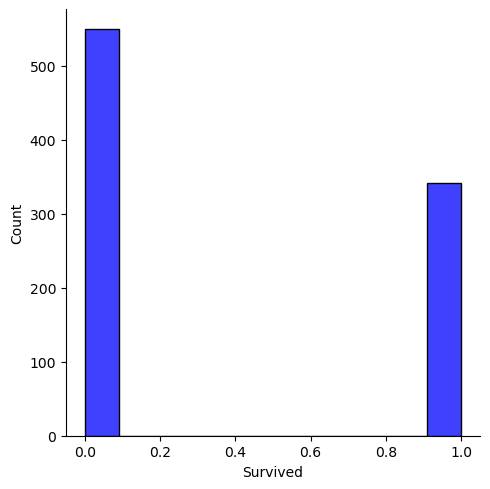

In [20]:
 sns.displot(train['Survived'],color='blue')

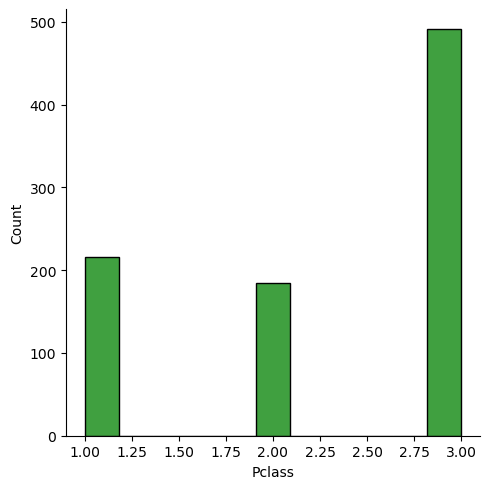

In [21]:
sns.displot(train['Pclass'],color='green')

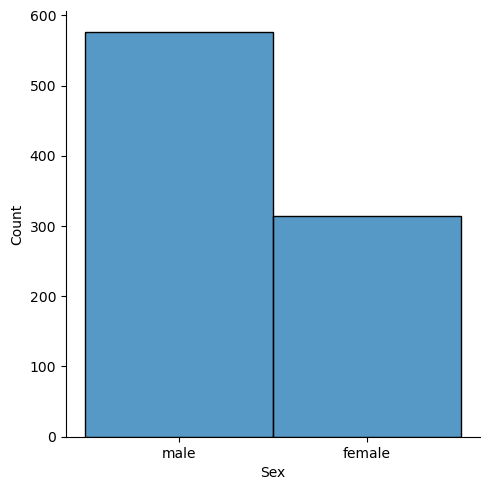

In [26]:
sns.displot(train['Sex'])
## More Males as compared to females maybe because majority of working class is travelling 

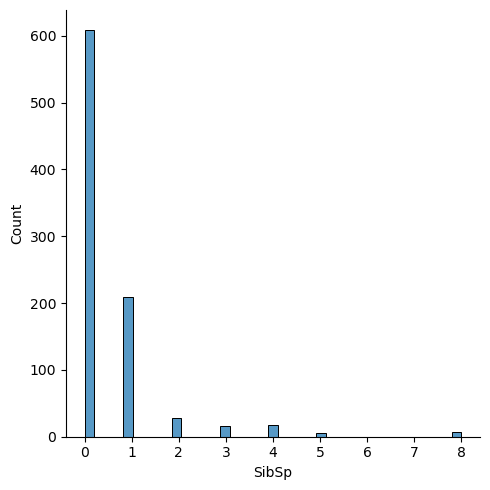

In [23]:
sns.displot(train['SibSp'])
## Uneven distribution

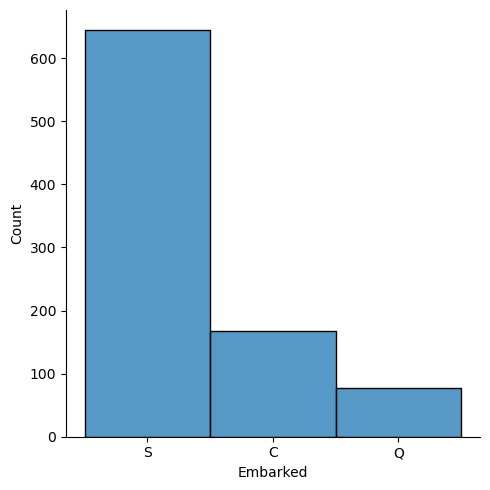

In [25]:
sns.displot(train['Embarked'])
## Major People have come from Southampton as compared to Cherbourg and Queenstown

**NUMERICAL DATA VISUALIZATION**

<Axes: xlabel='Age', ylabel='Density'>

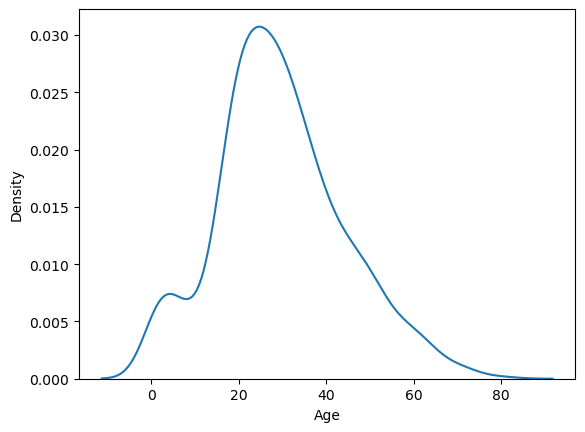

In [24]:
sns.kdeplot(train['Age'])
## Proper bell shaped curve so we can uniform distribution so no preprocessing required on this
## Major age group is around 20 to 30 and less elderly people like age from 60 to 80 are travelling

<Axes: xlabel='Fare', ylabel='Density'>

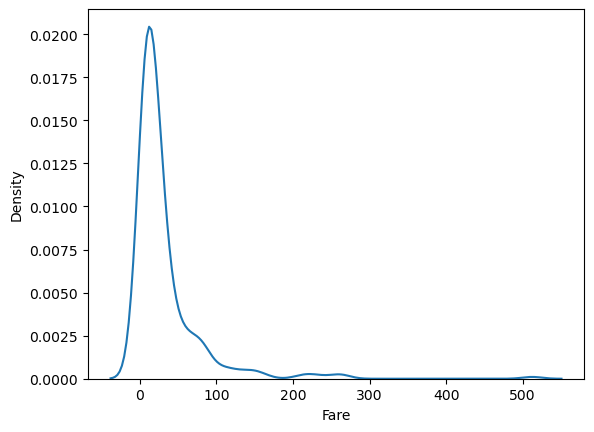

In [28]:
sns.kdeplot(train['Fare'])
## Very uneven curve and not uniform like bell shaped so we have to preprocessing on this if its included in the training set

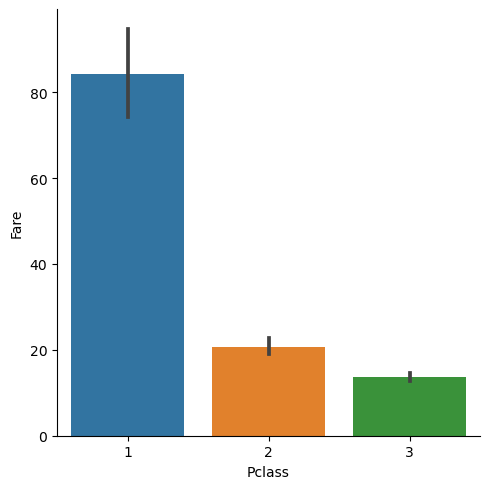

In [33]:
## Checking the relationship between fare and p class
sns.catplot(x='Pclass', y='Fare',data=train,kind='bar') 
## 1ST CLASS TICKET COSTS ARE VERY HIGH  AS COMPARED TO 2ND AND 3RD CLASS TICKETS

 **DATA PREPROCESSING**

In [54]:
df=pd.concat([train,test],axis=0)
df=df.reset_index()
## When u concat 2 datasets on whole then always reset index 

In [56]:
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
## checking for null values
df.isnull().sum()
### Survived is ignotred as null values have come from test dataset
### Cabin is dropped and age and fare is replaced with mean as they ae numerical and embarked is replaced with mode as it is categorical

index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [80]:
df.drop(['index'],inplace=True,axis=1)
## CABIN AND INDEX WERE DROPPED BUT IF RERAN THE CELL WITH CABIN IT WILL GIVE AN   ERROR

In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.224624,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.294333,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.295057,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,4.009150,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.307573,S


In [82]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [83]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [84]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

<Axes: xlabel='Fare', ylabel='Density'>

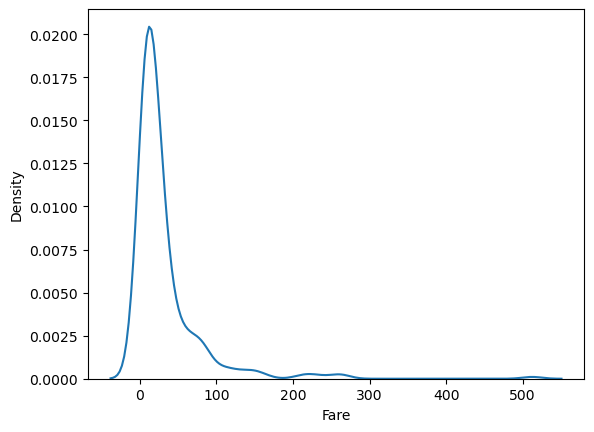

In [85]:
sns.kdeplot(train['Fare'])
## AS IT IS NON UNIFORM WE WILL MAKE IT UNIFORM USING LOG TRANSFORMATION

<Axes: xlabel='Fare', ylabel='Density'>

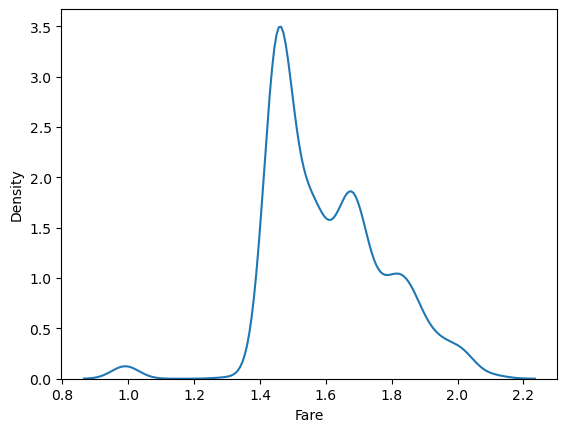

In [86]:
sns.kdeplot(np.log(df['Fare']+2))
## We can see the graph is uniform now

In [87]:
df['Fare']=np.log(df['Fare']+2)
# SINCE IT WAS UNIFORM WE STORED IN THAT FAIR COLOUMN

In [88]:
corr=df.corr()

C:\Users\saran\AppData\Local\Temp\ipykernel_12040\1726683880.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

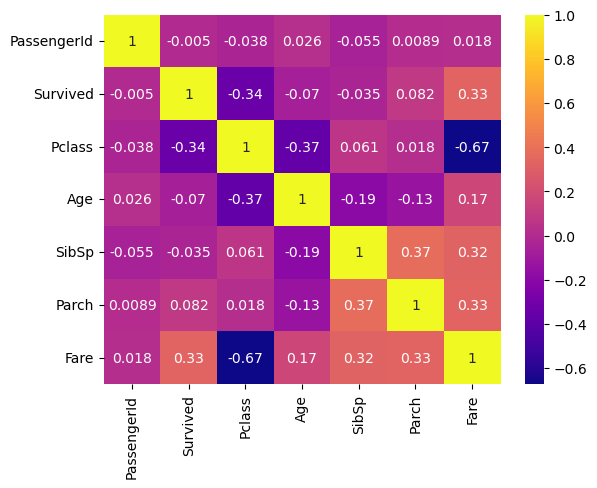

In [91]:
sns.heatmap(corr,annot=True,cmap='plasma')

In [92]:
## Droppping The unrelated coloumns
df.drop([ 'Name','Ticket'],inplace=True,axis=1)

In [94]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,1.440930,S
1,2,1.0,1,female,38.0,1,0,1.839650,C
2,3,1.0,3,female,26.0,0,0,1.457465,S
3,4,1.0,1,female,35.0,1,0,1.793283,S
4,5,0.0,3,male,35.0,0,0,1.460375,S


In [95]:
## Label Encoding Sex and embarked
from sklearn.preprocessing import LabelEncoder

In [96]:
cols=['Sex','Embarked']
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])

In [97]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,1.440930,2
1,2,1.0,1,0,38.0,1,0,1.839650,0
2,3,1.0,3,0,26.0,0,0,1.457465,2
3,4,1.0,1,0,35.0,1,0,1.793283,2
4,5,0.0,3,1,35.0,0,0,1.460375,2


In [105]:
train_len=len(train)
print(train_len)
## Split the df data into train and test and train will be till actual train_len and test will be from train_len till end

891


In [106]:
train=df.iloc[:train_len,:]
test=df.iloc[train_len:,:]

In [107]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,1.440930,2
1,2,1.0,1,0,38.0,1,0,1.839650,0
2,3,1.0,3,0,26.0,0,0,1.457465,2
3,4,1.0,1,0,35.0,1,0,1.793283,2
4,5,0.0,3,1,35.0,0,0,1.460375,2


In [108]:
from sklearn.model_selection import train_test_split
# X is input ie without survived
# Y is output ie survived

In [109]:
## FULL DATA
x=train.drop(['Survived','PassengerId'],axis=1) 
y=train['Survived']

In [120]:
def classification(model,X,Y):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)
    ## THIS IS MODEL TRAINING WITH SPLIT DATA
    model.fit(X_train,Y_train)
    print("Accuracy is ", model.score(X_test,Y_test)*100)

In [121]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()
classification(model,x,y)

Accuracy is  78.64406779661017


C:\Users\saran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [122]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
classification(model,x,y)

Accuracy is  74.23728813559322


In [123]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classification(model,x,y)

Accuracy is  75.9322033898305


In [124]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classification(model,x,y)

Accuracy is  81.69491525423729


In [125]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
classification(model,x,y)

Accuracy is  76.27118644067797


**MODEL TRAINING WITH FULL DATA**


*We will use Random Forest CLassifier as it has given the best accuracy to predict*

In [128]:
model=RandomForestClassifier()
model.fit(x,y)

RandomForestClassifier()

In [129]:
# TEST DATA SPLIT
x_train=test.drop(['Survived','PassengerId'],axis=1) 

In [130]:
predict=model.predict(x_train)
predict

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0.

In [131]:
pred=pd.read_csv(r"C:\Users\saran\titanic\gender_submission.csv")

In [132]:
pred.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [133]:
pred['Survived']=predict

In [134]:
pred.head(10)

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,1.0
4,896,0.0
5,897,0.0
6,898,0.0
7,899,0.0
8,900,1.0
9,901,0.0


In [135]:
pred.to_csv(r'C:\Users\saran\titanic\submission.csv')